In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, KFold
import warnings


#Завдання 1
Підготуйте набір даних, щоб у ньому не було пропусків та якісні показники були
бінаризовані або перекодовані (залежно від того, вони номінальні чи порядкові).
Масштабувати кількісні показники на цьому етапі не обов’язково. Масштабувати
доречно лише для тих класифікаторів, які цього вимагають.

In [2]:
# 1. Подготовка данных
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
data = pd.read_csv('adult.data', header=None, na_values='?')
data.columns = columns
warnings.filterwarnings ('ignore')

Заповнюємо пропуски в колонках 'workclass' та 'occupation' найпоширенішими значеннями в цих колонках. Видаляємо рядки з пропусками в колонці 'native-country'.
 Видаляємо колонку 'education', оскільки її інформація вже міститься в 'education-num'.

In [3]:

# Заполнение пропусков
data.fillna({'workclass': data['workclass'].mode()[0]}, inplace=True)
data.fillna({'occupation': data['occupation'].mode()[0]}, inplace=True)
data.dropna(subset=['native-country'], inplace=True)

# Удаление столбца education
data.drop(columns=['education'], inplace=True)


In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Перетворюємо значення колонки 'native-country' на бінарні

In [5]:
# Преобразование столбца native-country
data['native-country'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)


In [6]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K


Перетворюємо категоріальні змінні на числові за допомогою функції pd.get_dummies.

In [7]:
# Кодирование категориальных признаков
data = pd.get_dummies(data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex'], drop_first=True)


In [8]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,77516,13,2174,0,40,0,<=50K,False,False,...,True,False,False,False,False,False,False,False,True,True
1,50,83311,13,0,0,13,0,<=50K,False,False,...,False,False,False,False,False,False,False,False,True,True
2,38,215646,9,0,0,40,0,<=50K,False,False,...,True,False,False,False,False,False,False,False,True,True
3,53,234721,7,0,0,40,0,<=50K,False,False,...,False,False,False,False,False,False,True,False,False,True
4,28,338409,13,0,0,40,0,<=50K,False,False,...,False,False,False,False,True,False,True,False,False,False


True - 1,
False - 0

#Завдання 2
Перевірте, чи збалансовані класи.

Перевіряємо, наскільки збалансовані наші класи 'income' за допомогою кругової діаграми.

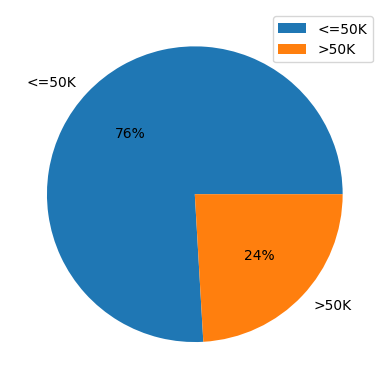

In [9]:
# 2. Проверка сбалансированности классов
counts = data['income'].value_counts()
plt.pie(counts, labels=['<=50K', '>50K'], autopct='%1.f%%')
plt.legend()
plt.show()


#Завдання 4
Розділіть набір даних на 2 вибірки: навчальну та тестову (функція
sklearn.model_selection.train_test_split).

Ділимо дані на навчальний і тестовий набори у співвідношенні 80:20 за допомогою функції train_test_split.

In [10]:
# 4. Разделение данных на обучающую и тестовую выборки
X = data.loc[:, data.columns != 'income']
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Завдання 5
Навчіть логістичну регресію без регуляризації на навчальній частині. Якщо
виникнуть проблеми, проекспериментуйте з параметром solver. Згадайте, як
виглядає модель бінарної та мультиноміальної логістичної регресій. Ви маєте
справу з випадком двох класів чи багатьох класів? Якщо з багатьма класами, то ви
відновили мультиноміальну регресію чи набір бінарних? Який з параметрів класу
sklearn.linear_model.LogisticRegression за це відповідає? Виведіть параметри
відновленої Вами моделі на екран. Чи зрозуміло Вам що це за параметри, чому їх
така кількість?

Навчання логістичної регресії без регуляризації:

Створюємо та навчаємо модель логістичної регресії на навчальних даних без регуляризації.

Суть навчання логістичної регресії полягає в тому, що модель вивчає, як вхідні ознаки впливають на вихідний результат (клас). Для цього використовується функція, яка називається "логістичною функцією", що перетворює значення вхідних ознак у значення ймовірностей належності до певного класу.

Під час навчання модель шукає оптимальні значення коефіцієнтів, які найкраще відображають цю залежність. Це робиться за допомогою методу градієнтного спуску.


In [14]:
# 5. Обучение логистической регрессии без регуляризации(рассписать в чем суть)
model = LogisticRegression(penalty='none', solver='saga', max_iter=2500 )
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Вывод параметров модели
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-3.1204023e-06]
Coefficients: [[-6.00238719e-05 -6.39818583e-06 -1.41655749e-05  3.13477881e-04
   5.99777251e-04 -6.71496507e-05  0.00000000e+00  1.41248643e-07
   1.77327084e-09 -3.36309170e-09 -2.75835139e-06  3.55716115e-07
  -1.88573675e-07 -7.30642841e-08 -6.12435656e-09  3.29696256e-09
   3.47276653e-06 -1.40180336e-07 -4.24535180e-06 -3.65103560e-07
  -3.76506440e-07 -9.63720600e-07 -3.17924584e-09 -4.10192425e-07
   1.08859079e-06 -3.66655826e-07 -4.63793176e-07 -5.20086850e-07
  -1.32504585e-06 -6.74802834e-08  8.08913756e-07  6.49197626e-08
  -1.65429201e-07  4.26802865e-08 -2.46896812e-07 -2.70720127e-06
  -3.86725289e-07 -2.24324102e-06 -1.30781302e-06  4.31813880e-07
  -1.36424384e-07 -6.67342104e-07 -8.51036406e-08 -2.09567554e-06
   2.64752858e-07]]


#Завдання 6
Розрахуйте материки якості на навчальній та тестовій частинах. Скажіть, чи не
виникло перенавчання? Також подивіться на матрицю помилок, чи усі класи добре
розпізнаються?

In [15]:
# 6. Расчет метрик качества
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Train balanced accuracy:", balanced_accuracy_score(y_train, y_pred_train))
print("Train confusion matrix:\n", confusion_matrix(y_train, y_pred_train))

print("Test accuracy:", accuracy_score(y_test, y_pred_test))
print("Test balanced accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test))


Train accuracy: 0.7944563882063882
Train balanced accuracy: 0.6080122695250615
Train confusion matrix:
 [[19136   642]
 [ 4712  1558]]
Test accuracy: 0.7968678028558268
Test balanced accuracy: 0.6125803431839897
Test confusion matrix:
 [[4787  155]
 [1168  403]]


#Завдання 7
Навчіть логістичну регресію з регуляризацією (L2 або L1 за власним бажанням). Для
цього Вам потрібно підібрати оптимальне значення параметра регуляризації. Це

можна зробити «вручну» або за допомогою вбудованих засобів бібліотеки scikit-
learn. Спробуйте такі варіанти:

 Попередньо задайте масив можливих значень гіперпараметра.
 Розбийте навчальну вибірку на 2 частини: навчальну та валідаційну.
Переберіть усі можливі значення гіперпараметра, при кожному значенні навчайте
логістичну регресію на навчальній частині і оцінюйте якість як на навчальній, так і

на валідаційній частинах. Оберіть в якості оптимального значення те, за якого якість
моделі на валідаційній частині найкраща. Згадайте, чому ми тут виділяємо з
навчальної вибірки валідаційну частину, а не використовуємо тестову?
 Скористайтеся функцією validation_curve з модуля sklearn.model_selection,
щоб побудувати криву навчання. Подивіться на отриману криву і скажіть, яке
значення гіперпараметра найкраще. Розберіться як «під капотом» працює дана
функція, яка саме метрика якості в ній оцінюється (аргумент scoring), в який спосіб
оцінюється ця метрика (аргумент cv), що таке ковзний контроль. Зверніть увагу, що
на основі валідаційної кривої можна підбирати лише один гіперпараметр.
 Скористайтеся класом GridSearchCV або RandomizedSearchCV з модуля
sklearn.model_selection для автоматичного підбору гіперпараметра. Тут, як і в
попередньому варіанті, зверніть увагу на аргументи scoring та cv.

C: 0.01, Train Accuracy: 0.6173363976475778, Validation Accuracy: 0.6081743712340728
Train Confusion Matrix:
[[15255   519]
 [ 3709  1355]]
Validation Confusion Matrix:
[[3851  153]
 [ 899  307]]

C: 0.11, Train Accuracy: 0.6167683923451934, Validation Accuracy: 0.6065959330884705
Train Confusion Matrix:
[[15262   512]
 [ 3717  1347]]
Validation Confusion Matrix:
[[3845  159]
 [ 901  305]]

C: 0.21000000000000002, Train Accuracy: 0.6167683923451934, Validation Accuracy: 0.6065959330884705
Train Confusion Matrix:
[[15262   512]
 [ 3717  1347]]
Validation Confusion Matrix:
[[3845  159]
 [ 901  305]]

C: 0.31000000000000005, Train Accuracy: 0.6167683923451934, Validation Accuracy: 0.6065959330884705
Train Confusion Matrix:
[[15262   512]
 [ 3717  1347]]
Validation Confusion Matrix:
[[3845  159]
 [ 901  305]]

C: 0.41000000000000003, Train Accuracy: 0.6167683923451934, Validation Accuracy: 0.6065959330884705
Train Confusion Matrix:
[[15262   512]
 [ 3717  1347]]
Validation Confusion Matrix

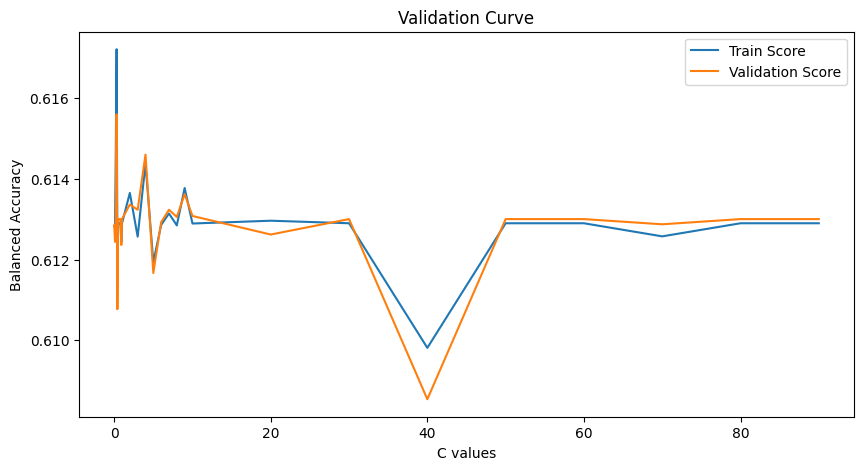

In [16]:
# 7. Обучение логистической регрессии с регуляризацией и подбор гиперпараметра
warnings.filterwarnings('ignore')

# Определяем диапазоны значений гиперпараметра C
C_values = np.concatenate((np.arange(0.01, 1, 0.1), np.arange(1, 10, 1), np.arange(10, 100, 10)))

# Разбиваем данные на обучающую и валидационную выборки
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_val_accuracy = 0
optimal_C = None

# Перебираем значения C и находим оптимальное
for C in C_values:
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    model.fit(X_train_part, y_train_part)

    train_accuracy = balanced_accuracy_score(y_train_part, model.predict(X_train_part))
    train_conf_matrix = confusion_matrix(y_train_part, model.predict(X_train_part))

    val_accuracy = balanced_accuracy_score(y_val, model.predict(X_val))
    val_conf_matrix = confusion_matrix(y_val, model.predict(X_val))

    print(f"C: {C}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    print(f"Train Confusion Matrix:\n{train_conf_matrix}\nValidation Confusion Matrix:\n{val_conf_matrix}\n")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        optimal_C = C

print(f"\nBest C: {optimal_C}, Best Validation Accuracy: {best_val_accuracy}")

# Тренируем модель с оптимальным значением C на полной обучающей выборке
final_model = LogisticRegression(penalty='l2', C=optimal_C, solver='liblinear')
final_model.fit(X_train, y_train)

test_accuracy = balanced_accuracy_score(y_test, final_model.predict(X_test))
print(f"Test Accuracy: {test_accuracy}")
print(confusion_matrix(y_test, final_model.predict(X_test)))

# Построение кривых обучения для различных значений C
train_scores, validation_scores = validation_curve(
    LogisticRegression(penalty='l2'),
    X_train, y_train,
    param_name='C', param_range=C_values,
    scoring='balanced_accuracy', cv=KFold(shuffle=True)
)
#Визуализация
plt.figure(figsize=(10, 5))
plt.plot(C_values, train_scores.mean(axis=1), label='Train Score')
plt.plot(C_values, validation_scores.mean(axis=1), label='Validation Score')
plt.xlabel('C values')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.title('Validation Curve')
plt.show()



в самому початку була найкраща якість

In [17]:

# Использование GridSearchCV для автоматического подбора гиперпараметра
param_grid = {'C': C_values}
grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid, scoring='balanced_accuracy',)
grid_search.fit(X_train, y_train)

best_param_C = grid_search.best_params_['C']
best_grid_score = grid_search.best_score_

print(f"Best C from GridSearchCV: {best_param_C}")
print(f"Best Validation Score from GridSearchCV: {best_grid_score}")

Best C from GridSearchCV: 0.51
Best Validation Score from GridSearchCV: 0.6134522828232158


GridSearchCV хуже спарвился с завданням.В ручную у нас получилось лучше.

#Завдання 8
Для логістичної регресії з підібраним гіперпараметром розрахуйте материки якості
на навчальній та тестовій частинах. Які висновки можна зробити?

In [18]:

# 8. Навчання і оцінка модели с лучшим гиперпараметром
model3 = LogisticRegression(penalty='l2', C=best_param_C, solver='liblinear', random_state=42)
model3.fit(X_train, y_train)
print("Train accuracy with best C:", balanced_accuracy_score(y_train, model3.predict(X_train)))
print("Train confusion matrix with best C:\n", confusion_matrix(y_train, model3.predict(X_train)))
print("Test accuracy with best C:", balanced_accuracy_score(y_test, model3.predict(X_test)))
print("Test confusion matrix with best C:\n", confusion_matrix(y_test, model3.predict(X_test)))


Train accuracy with best C: 0.6128436167778126
Train confusion matrix with best C:
 [[19141   637]
 [ 4653  1617]]
Test accuracy with best C: 0.6187433683304305
Test confusion matrix with best C:
 [[4785  157]
 [1148  423]]


Якість З найкращима гіперпараметрами, не дуже змінилась зравнюючи з ручним підбором і з GridSearchCV. Також другий клас гірше працює.

#Завдання 10
Спробуйте навчити ще один класифікатор, підібравши для нього оптимальні
значення гіперпараметрів, і оцінити його якість. Як варіант, можете використати в
якості класифікатора правило k найближчих сусідів. Для нього потрібно буде
підібрати оптимальне значення k і попередньо масштабувати кількісні показники,
привівши їх, наприклад, до діапазону [0; 1] (чому це важливо для даного
класифікатора?). Або можете навчити ліс випадкових дерев. Цей класифікатор
більш потужний, але він схильний до перенавчання. Розберіться, які з його
гіперпараметрів є найважливішими і спробуйте підібрати їх, щоб зменшити
перенавчання, якщо воно має місце на Вашому наборі даних.

In [19]:
# 10. Обучение k-NN классификатора
from sklearn.preprocessing import MinMaxScaler

#Нормалізація данних, тому що k найближчих сусідів розраховує відстань.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='balanced_accuracy')
knn_grid.fit(X_train_scaled, y_train)
print("Best k:", knn_grid.best_params_)
print("Best score:", knn_grid.best_score_)
best_k = knn_grid.best_params_['n_neighbors']

knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train_scaled, y_train)
y_pred = knn2.predict(X_test_scaled)
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Test confusion matrix:\n", cm)


Best k: {'n_neighbors': 11}
Best score: 0.7465294289238555
Test accuracy: 0.7483582955021728
Test confusion matrix:
 [[4553  389]
 [ 667  904]]


Краще всього 11 сусідів. І другий класс краще запрацював.

#Завдання 11
Порівняйте якість навчених класифікаторів на тестовій частині. Який класифікатор
є якіснішим?

К найближчих сусідів виявився краще